In [2]:
import mne
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

In [4]:
SUBJECT_DIR = "/home/carlos/Datasets/subjects/MNIAverage"
CEREBRA_DIR = "/home/carlos/Datasets/Cerebra/10.12751_g-node.be5e62"

In [3]:
# Sample localized source position
xyz_ras_raw=np.array([50.50000077, 22.49999903, 48.49999957])

In [5]:
# Transform to voxel
t1 = nib.load(f'{SUBJECT_DIR}/mri/T1.mgz')
vox_raw = mne.transforms.apply_trans(np.linalg.inv(t1.affine), xyz_ras_raw).astype(int)
vox_raw

array([ 77,  98, 167])

In [6]:
# Plot voxel position in volume
def imshow_mri(data, img, vox, xyz, suptitle):
    """Show an MRI slice with a voxel annotated."""
    i, j, k = vox
    fig, ax = plt.subplots(1, figsize=(6, 6))
    codes = nib.orientations.aff2axcodes(img.affine)
    # Figure out the title based on the code of this axis
    ori_slice = dict(P='Coronal', A='Coronal',
                     I='Axial', S='Axial',
                     L='Sagittal', R='Saggital')
    ori_names = dict(P='posterior', A='anterior',
                     I='inferior', S='superior',
                     L='left', R='right')
    title = ori_slice[codes[0]]
    ax.imshow(data[i], vmin=10, vmax=120, cmap='gray', origin='lower')
    ax.axvline(k, color='y')
    ax.axhline(j, color='y')
    for kind, coords in xyz.items():
        annotation = ('{}: {}, {}, {} mm'
                      .format(kind, *np.round(coords).astype(int)))
        text = ax.text(k, j, annotation, va='baseline', ha='right',
                       color=(1, 1, 0.7))
        text.set_path_effects([
            path_effects.Stroke(linewidth=2, foreground='black'),
            path_effects.Normal()])
    # reorient view so that RAS is always rightward and upward
    x_order = -1 if codes[2] in 'LIP' else 1
    y_order = -1 if codes[1] in 'LIP' else 1
    ax.set(xlim=[0, data.shape[2] - 1][::x_order],
           ylim=[0, data.shape[1] - 1][::y_order],
           xlabel=f'k ({ori_names[codes[2]]}+)',
           ylabel=f'j ({ori_names[codes[1]]}+)',
           title=f'{title} view: i={i} ({ori_names[codes[0]]}+)')
    fig.suptitle(suptitle)
    fig.subplots_adjust(0.1, 0.1, 0.95, 0.85)
    return fig

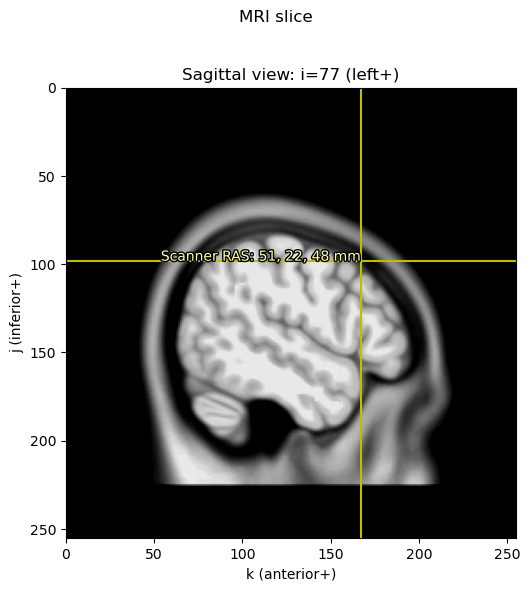

In [8]:
data = np.asarray(t1.dataobj)
imshow_mri(data, t1, vox_raw, {'Scanner RAS': xyz_ras_raw}, 'MRI slice')
pass

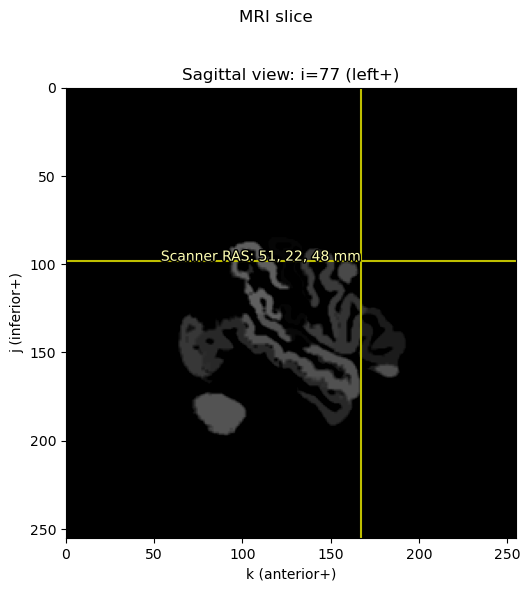

In [10]:
cerebra_img = nib.load(f"{CEREBRA_DIR}/CerebrA_in_head.mgz")
data = np.asarray(cerebra_img.dataobj)
imshow_mri(data, cerebra_img, vox_raw, {'Scanner RAS': xyz_ras_raw}, 'MRI slice')
pass

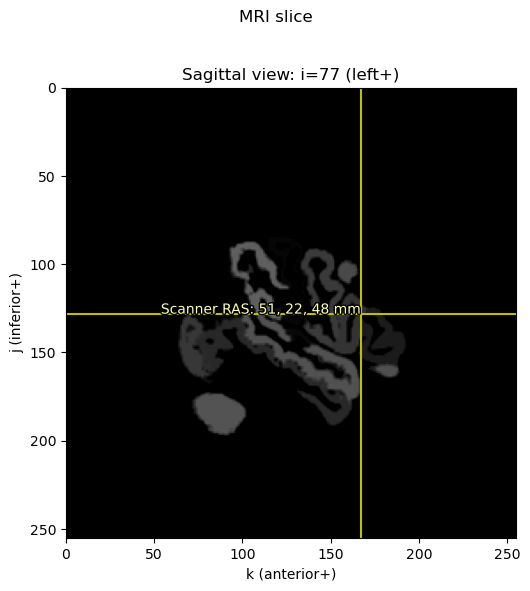

In [11]:
vox_raw = np.array([ 77,  128, 167])
data = np.asarray(cerebra_img.dataobj)
imshow_mri(data, cerebra_img, vox_raw, {'Scanner RAS': xyz_ras_raw}, 'MRI slice')
pass

In [12]:
data.shape, vox_raw.shape, vox_raw
data[vox_raw[0], vox_raw[1], vox_raw[2]]

32.0